<a href="https://colab.research.google.com/github/kvnsx/Hotel-Price-Prediction/blob/main/hotel_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

#Load Datasets & Checking Records

In [ ]:
#Data train features
features = pd.read_csv('train_features.csv')
#Data train labels
labels = pd.read_csv('train_label.csv')
#Data test
test = pd.read_csv('test_feature.csv')

In [ ]:
#First five records of data train features
features.head()

,facilities,rating,location
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol


In [ ]:
#First five records of data train labels
labels.head()

,Price
0,"13,500avg/night"
1,"13,000avg/night"
2,"19,000avg/night"
3,"6,000avg/night"
4,"20,000avg/night"


In [ ]:
#First five records of data test
test.head()

,ID,facilities,rating,location
0,0,GymrestaurantbarInternetSwimmingPools,8.0 ExcellentFrom 1 reviews,Stokol
1,1,Poolrestaurantgyminternetbar,7.4 Very GoodFrom 22 reviews,Hallerson
2,2,BARSwimmingPoolsInternetgym,0.0 FairFrom 4 reviews,Hallerson
3,3,gymSwimmingPoolsBARintrnetRestaurant,6.8 Very GoodFrom 13 reviews,Andeman
4,4,gymRestaurantpoolbarintrnet,0.0 FairFrom 9 reviews,Hallerson


In [ ]:
#Checking entries, data type, and nullity of features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  2765 non-null   object
 1   rating      2429 non-null   object
 2   location    3066 non-null   object
dtypes: object(3)
memory usage: 72.0+ KB


In [ ]:
#Checking entries and data type
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   3066 non-null   object
dtypes: object(1)
memory usage: 24.1+ KB


In [ ]:
#Checking entries and data type
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          767 non-null    int64 
 1   facilities  767 non-null    object
 2   rating      767 non-null    object
 3   location    767 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.1+ KB


In [ ]:
#Check features nullity
features.isnull().sum()

facilities    301
rating        637
location        0
dtype: int64

In [ ]:
#Check labels nullity
labels.isnull().sum()

Price    0
dtype: int64

In [ ]:
#Check test nullity
test.isnull().sum()

ID            0
facilities    0
rating        0
location      0
dtype: int64

#Data Cleaning

In [ ]:
#Concatenate features and labels
train = pd.concat([features, labels], axis=1)
train

,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,"13,500avg/night"
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,"13,000avg/night"
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,"19,000avg/night"
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,"6,000avg/night"
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,"20,000avg/night"
...,...,...,...,...
3061,barInternet,NaN,Andeman,"31,625avg/night"
3062,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia,"30,500avg/night"
3063,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian,"14,000avg/night"
3064,Restaurant,NaN,Hallerson,"8,500avg/night"


In [ ]:
#Trimming price to get the amount of the price
train['Price'] = train['Price'].str.replace('avg/night', '').str.replace(',', '')
train

,facilities,rating,location,Price
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol,13500
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile,13000
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland,19000
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia,6000
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol,20000
...,...,...,...,...
3061,barInternet,NaN,Andeman,31625
3062,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia,30500
3063,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian,14000
3064,Restaurant,NaN,Hallerson,8500


In [ ]:
#Convert price column data type from object into integer
train['Price'] = pd.to_numeric(train['Price'], errors='coerce')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   facilities  2765 non-null   object
 1   rating      2429 non-null   object
 2   location    3066 non-null   object
 3   Price       3066 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 95.9+ KB


In [ ]:
#Show records sorted by Price
train.sort_values('Price')

,facilities,rating,location,Price
2333,NaN,NaN,Hallerson,1500
2773,NaN,NaN,Uberlandia,1500
822,NaN,NaN,Machlessvile,1500
162,NaN,NaN,Stokol,1500
1899,Barrestaurant,NaN,Stokol,1700
...,...,...,...,...
1856,InternetBARRestaurant,7.0 Very GoodFrom 20 reviews,Ubisville,143802
1030,intrnetRestaurantBAR,7.0 Very GoodFrom 20 reviews,Andeman,143802
1424,RestaurantintrnetBar,7.0 Very GoodFrom 20 reviews,Machlessvile,143802
2346,InternetBarrestaurant,7.0 Very GoodFrom 20 reviews,Willsmian,143802


In [ ]:
#Remove records if facilities are NaN
train = train[~(train['rating'].isnull() & train['facilities'].notnull())]
train.reset_index(drop=True, inplace=True)
train.sort_values('Price')

,facilities,rating,location,Price
700,NaN,NaN,Machlessvile,1500
140,NaN,NaN,Stokol,1500
1995,NaN,NaN,Hallerson,1500
2380,NaN,NaN,Uberlandia,1500
2060,NaN,NaN,Hallerson,1800
...,...,...,...,...
706,restaurantintrnetBAR,7.0 Very GoodFrom 20 reviews,Uberlandia,143802
1588,InternetBARRestaurant,7.0 Very GoodFrom 20 reviews,Ubisville,143802
883,intrnetRestaurantBAR,7.0 Very GoodFrom 20 reviews,Andeman,143802
1220,RestaurantintrnetBar,7.0 Very GoodFrom 20 reviews,Machlessvile,143802


In [ ]:
#Remove records if facilities also rating are NaN
train = train[~(train['rating'].isnull() & train['facilities'].isnull())]
train.reset_index(drop=True, inplace=True)
train.sort_values('Price')

,facilities,rating,location,Price
1390,NaN,3.6 FairFrom 1 review,Uberlandia,2200
2204,NaN,3.6 FairFrom 1 review,Stokol,2200
1031,NaN,3.6 FairFrom 1 review,Andeman,2200
1046,NaN,3.6 FairFrom 1 review,Hallerson,2200
202,bar,4.3 GoodFrom 3 reviews,Stokol,2250
...,...,...,...,...
1136,RestaurantintrnetBar,7.0 Very GoodFrom 20 reviews,Machlessvile,143802
1472,InternetBARRestaurant,7.0 Very GoodFrom 20 reviews,Ubisville,143802
662,restaurantintrnetBAR,7.0 Very GoodFrom 20 reviews,Uberlandia,143802
555,internetBARrestaurant,7.0 Very GoodFrom 20 reviews,Stokol,143802


In [ ]:
#Split train into labels alone
labels = train.loc[:,['Price']]
labels

,Price
0,13500
1,13000
2,19000
3,6000
4,20000
...,...
2424,5000
2425,30000
2426,30500
2427,14000


In [ ]:
#Split train without labels into features
features = train.loc[:,['facilities', 'rating', 'location']]
features

,facilities,rating,location
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol
...,...,...,...
2424,restaurantBAR,7.6 Very GoodFrom 3 reviews,Andeman
2425,barrestaurantPoolGym,7.8 Very GoodFrom 351 reviews,Andeman
2426,restaurantBarInternet,8.1 ExcellentFrom 4 reviews,Uberlandia
2427,Barrestaurantswimmingpools,6.7 Very GoodFrom 10 reviews,Willsmian


In [ ]:
#Save ID column in a variable then drop it so we can transform features and test together in combine
id = test['ID']
test.drop('ID', axis=1, inplace=True)
combine = [features, test]

In [ ]:
#Transform facilities' values into the same camelcase word
for dataset in combine:
  dataset['facilities'] = dataset['facilities'].str.replace('restaurant', 'Restaurant', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('bar', 'Bar', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('swimmingpools', 'Swimming Pool', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('pool', 'Swimming Pool', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('pools', 'Swimming Pool', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('gym', 'Gym', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('internet', 'Internet', regex=True, flags=re.IGNORECASE)
  dataset['facilities'] = dataset['facilities'].str.replace('intrnet', 'Internet', regex=True, flags=re.IGNORECASE)
  
  print(dataset)

                               facilities                         rating  \
0     RestaurantBarSwimming Swimming Pool   7.8 Very GoodFrom 10 reviews   
1                   InternetRestaurantGym         5.6 GoodFrom 4 reviews   
2           RestaurantGymSwimming PoolBar   7.2 Very GoodFrom 38 reviews   
3                           BarRestaurant    7.3 Very GoodFrom 6 reviews   
4                      InternetRestaurant   7.2 Very GoodFrom 30 reviews   
...                                   ...                            ...   
2424                        RestaurantBar    7.6 Very GoodFrom 3 reviews   
2425        BarRestaurantSwimming PoolGym  7.8 Very GoodFrom 351 reviews   
2426                RestaurantBarInternet    8.1 ExcellentFrom 4 reviews   
2427  BarRestaurantSwimming Swimming Pool   6.7 Very GoodFrom 10 reviews   
2428                     BarSwimming Pool   7.8 Very GoodFrom 26 reviews   

          location  
0           Stokol  
1     Machlessvile  
2       Wanderland  
3  

In [ ]:
# Split facilities' values into list of facilities
for dataset in combine:
  dataset['facilities'] = dataset['facilities'].str.findall(r'(Restaurant|Bar|Swimming Pool|Internet|Gym)')

  print(dataset)

                                 facilities                         rating  \
0          [Restaurant, Bar, Swimming Pool]   7.8 Very GoodFrom 10 reviews   
1               [Internet, Restaurant, Gym]         5.6 GoodFrom 4 reviews   
2     [Restaurant, Gym, Swimming Pool, Bar]   7.2 Very GoodFrom 38 reviews   
3                         [Bar, Restaurant]    7.3 Very GoodFrom 6 reviews   
4                    [Internet, Restaurant]   7.2 Very GoodFrom 30 reviews   
...                                     ...                            ...   
2424                      [Restaurant, Bar]    7.6 Very GoodFrom 3 reviews   
2425  [Bar, Restaurant, Swimming Pool, Gym]  7.8 Very GoodFrom 351 reviews   
2426            [Restaurant, Bar, Internet]    8.1 ExcellentFrom 4 reviews   
2427       [Bar, Restaurant, Swimming Pool]   6.7 Very GoodFrom 10 reviews   
2428                   [Bar, Swimming Pool]   7.8 Very GoodFrom 26 reviews   

          location  
0           Stokol  
1     Machlessvile  


In [ ]:
#Checking the unique value of the list of facilities that there's no missed in splitting the words
facilities = features['facilities'].explode().unique()
facilities = [x for x in facilities if str(x) != 'nan']
facilities

['Restaurant', 'Bar', 'Swimming Pool', 'Internet', 'Gym']

In [ ]:
#Turning the column of facilities into 'Restaurant', 'Bar', 'Swimming Pool', 'Internet', 'Gym' column with the corresponding values
facilities_enc = pd.get_dummies(combine[0]['facilities'].apply(pd.Series).stack(), dummy_na=True).sum(level=0)
combine[0] = pd.concat([combine[0], facilities_enc], axis=1)
combine[0].info()

facilities_enc = pd.get_dummies(combine[1]['facilities'].apply(pd.Series).stack(), dummy_na=True).sum(level=0)
combine[1] = pd.concat([combine[1], facilities_enc], axis=1)
combine[1].info()

combine[0]

<ipython-input-24-89b459403ea2>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  facilities_enc = pd.get_dummies(combine[0]['facilities'].apply(pd.Series).stack(), dummy_na=True).sum(level=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   facilities     2327 non-null   object 
 1   rating         2429 non-null   object 
 2   location       2429 non-null   object 
 3   Bar            2327 non-null   float64
 4   Gym            2327 non-null   float64
 5   Internet       2327 non-null   float64
 6   Restaurant     2327 non-null   float64
 7   Swimming Pool  2327 non-null   float64
 8   nan            2327 non-null   float64
dtypes: float64(6), object(3)
memory usage: 170.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   facilities     767 non-null    object
 1   rating         767 non-null    object
 2   location       767 non-null    object
 3   Bar            767 non-null    u

<ipython-input-24-89b459403ea2>:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  facilities_enc = pd.get_dummies(combine[1]['facilities'].apply(pd.Series).stack(), dummy_na=True).sum(level=0)


,facilities,rating,location,Bar,Gym,Internet,Restaurant,Swimming Pool,NaN
0,"[Restaurant, Bar, Swimming Pool]",7.8 Very GoodFrom 10 reviews,Stokol,1.0,0.0,0.0,1.0,1.0,0.0
1,"[Internet, Restaurant, Gym]",5.6 GoodFrom 4 reviews,Machlessvile,0.0,1.0,1.0,1.0,0.0,0.0
2,"[Restaurant, Gym, Swimming Pool, Bar]",7.2 Very GoodFrom 38 reviews,Wanderland,1.0,1.0,0.0,1.0,1.0,0.0
3,"[Bar, Restaurant]",7.3 Very GoodFrom 6 reviews,Uberlandia,1.0,0.0,0.0,1.0,0.0,0.0
4,"[Internet, Restaurant]",7.2 Very GoodFrom 30 reviews,Stokol,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2424,"[Restaurant, Bar]",7.6 Very GoodFrom 3 reviews,Andeman,1.0,0.0,0.0,1.0,0.0,0.0
2425,"[Bar, Restaurant, Swimming Pool, Gym]",7.8 Very GoodFrom 351 reviews,Andeman,1.0,1.0,0.0,1.0,1.0,0.0
2426,"[Restaurant, Bar, Internet]",8.1 ExcellentFrom 4 reviews,Uberlandia,1.0,0.0,1.0,1.0,0.0,0.0
2427,"[Bar, Restaurant, Swimming Pool]",6.7 Very GoodFrom 10 reviews,Willsmian,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#Splitting rating column into rating_num column to get the rating value
for dataset in combine:
  dataset['rating_num'] = dataset['rating'].str.extract(r'(\d+\.\d+)')

  print(dataset)

                                 facilities                         rating  \
0          [Restaurant, Bar, Swimming Pool]   7.8 Very GoodFrom 10 reviews   
1               [Internet, Restaurant, Gym]         5.6 GoodFrom 4 reviews   
2     [Restaurant, Gym, Swimming Pool, Bar]   7.2 Very GoodFrom 38 reviews   
3                         [Bar, Restaurant]    7.3 Very GoodFrom 6 reviews   
4                    [Internet, Restaurant]   7.2 Very GoodFrom 30 reviews   
...                                     ...                            ...   
2424                      [Restaurant, Bar]    7.6 Very GoodFrom 3 reviews   
2425  [Bar, Restaurant, Swimming Pool, Gym]  7.8 Very GoodFrom 351 reviews   
2426            [Restaurant, Bar, Internet]    8.1 ExcellentFrom 4 reviews   
2427       [Bar, Restaurant, Swimming Pool]   6.7 Very GoodFrom 10 reviews   
2428                   [Bar, Swimming Pool]   7.8 Very GoodFrom 26 reviews   

          location  Bar  Gym  Internet  Restaurant  Swimming Po

In [ ]:
#Splitting rating column into reviews column to get the reviews count
for dataset in combine:
  dataset['reviews'] = dataset['rating'].str.extract(r'(\d+) review')

  print(dataset)

                                 facilities                         rating  \
0          [Restaurant, Bar, Swimming Pool]   7.8 Very GoodFrom 10 reviews   
1               [Internet, Restaurant, Gym]         5.6 GoodFrom 4 reviews   
2     [Restaurant, Gym, Swimming Pool, Bar]   7.2 Very GoodFrom 38 reviews   
3                         [Bar, Restaurant]    7.3 Very GoodFrom 6 reviews   
4                    [Internet, Restaurant]   7.2 Very GoodFrom 30 reviews   
...                                     ...                            ...   
2424                      [Restaurant, Bar]    7.6 Very GoodFrom 3 reviews   
2425  [Bar, Restaurant, Swimming Pool, Gym]  7.8 Very GoodFrom 351 reviews   
2426            [Restaurant, Bar, Internet]    8.1 ExcellentFrom 4 reviews   
2427       [Bar, Restaurant, Swimming Pool]   6.7 Very GoodFrom 10 reviews   
2428                   [Bar, Swimming Pool]   7.8 Very GoodFrom 26 reviews   

          location  Bar  Gym  Internet  Restaurant  Swimming Po

In [ ]:
#Splitting rating column into reviews column to get predicate of the rating
for dataset in combine:
  dataset['predicate'] = dataset['rating'].str.extract(r'\d+\.\d+\s+(.*?)From')

  print(dataset)

                                 facilities                         rating  \
0          [Restaurant, Bar, Swimming Pool]   7.8 Very GoodFrom 10 reviews   
1               [Internet, Restaurant, Gym]         5.6 GoodFrom 4 reviews   
2     [Restaurant, Gym, Swimming Pool, Bar]   7.2 Very GoodFrom 38 reviews   
3                         [Bar, Restaurant]    7.3 Very GoodFrom 6 reviews   
4                    [Internet, Restaurant]   7.2 Very GoodFrom 30 reviews   
...                                     ...                            ...   
2424                      [Restaurant, Bar]    7.6 Very GoodFrom 3 reviews   
2425  [Bar, Restaurant, Swimming Pool, Gym]  7.8 Very GoodFrom 351 reviews   
2426            [Restaurant, Bar, Internet]    8.1 ExcellentFrom 4 reviews   
2427       [Bar, Restaurant, Swimming Pool]   6.7 Very GoodFrom 10 reviews   
2428                   [Bar, Swimming Pool]   7.8 Very GoodFrom 26 reviews   

          location  Bar  Gym  Internet  Restaurant  Swimming Po

In [ ]:
#Encoding the predicate values with number
for dataset in combine:
  dataset.replace({'predicate' : {'Fair':1, 'Good':2, 'Very Good' : 3, 'Excellent':4}}, inplace=True)

  print(dataset)

                                 facilities                         rating  \
0          [Restaurant, Bar, Swimming Pool]   7.8 Very GoodFrom 10 reviews   
1               [Internet, Restaurant, Gym]         5.6 GoodFrom 4 reviews   
2     [Restaurant, Gym, Swimming Pool, Bar]   7.2 Very GoodFrom 38 reviews   
3                         [Bar, Restaurant]    7.3 Very GoodFrom 6 reviews   
4                    [Internet, Restaurant]   7.2 Very GoodFrom 30 reviews   
...                                     ...                            ...   
2424                      [Restaurant, Bar]    7.6 Very GoodFrom 3 reviews   
2425  [Bar, Restaurant, Swimming Pool, Gym]  7.8 Very GoodFrom 351 reviews   
2426            [Restaurant, Bar, Internet]    8.1 ExcellentFrom 4 reviews   
2427       [Bar, Restaurant, Swimming Pool]   6.7 Very GoodFrom 10 reviews   
2428                   [Bar, Swimming Pool]   7.8 Very GoodFrom 26 reviews   

          location  Bar  Gym  Internet  Restaurant  Swimming Po

In [ ]:
#Dropping facilities, rating, and NaN column because we don't use it anymore
for dataset in combine:
  dataset.drop('facilities', axis=1, inplace=True)
  dataset.drop('rating', axis=1, inplace=True)
  dataset.drop(np.nan, axis=1, inplace=True)

  print(dataset)

          location  Bar  Gym  Internet  Restaurant  Swimming Pool rating_num  \
0           Stokol  1.0  0.0       0.0         1.0            1.0        7.8   
1     Machlessvile  0.0  1.0       1.0         1.0            0.0        5.6   
2       Wanderland  1.0  1.0       0.0         1.0            1.0        7.2   
3       Uberlandia  1.0  0.0       0.0         1.0            0.0        7.3   
4           Stokol  0.0  0.0       1.0         1.0            0.0        7.2   
...            ...  ...  ...       ...         ...            ...        ...   
2424       Andeman  1.0  0.0       0.0         1.0            0.0        7.6   
2425       Andeman  1.0  1.0       0.0         1.0            1.0        7.8   
2426    Uberlandia  1.0  0.0       1.0         1.0            0.0        8.1   
2427     Willsmian  1.0  0.0       0.0         1.0            1.0        6.7   
2428       Andeman  1.0  0.0       0.0         0.0            1.0        7.8   

     reviews  predicate  
0         10 

In [ ]:
#Converting rating_num and reviews data types from object into numeric data type
for dataset in combine:
  dataset['rating_num'] = pd.to_numeric(dataset['rating_num'], errors='coerce')
  dataset['reviews'] = pd.to_numeric(dataset['reviews'], errors='coerce')
  dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       2429 non-null   object 
 1   Bar            2327 non-null   float64
 2   Gym            2327 non-null   float64
 3   Internet       2327 non-null   float64
 4   Restaurant     2327 non-null   float64
 5   Swimming Pool  2327 non-null   float64
 6   rating_num     2406 non-null   float64
 7   reviews        2429 non-null   int64  
 8   predicate      2406 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 170.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       767 non-null    object 
 1   Bar            767 non-null    uint8  
 2   Gym            767 non-null    uint8  
 3   Internet       76

In [ ]:
features = combine[0]
test = combine[1]

In [ ]:
train = pd.concat([features, labels], axis=1)
train

,location,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
0,Stokol,1.0,0.0,0.0,1.0,1.0,7.8,10,3.0,13500
1,Machlessvile,0.0,1.0,1.0,1.0,0.0,5.6,4,2.0,13000
2,Wanderland,1.0,1.0,0.0,1.0,1.0,7.2,38,3.0,19000
3,Uberlandia,1.0,0.0,0.0,1.0,0.0,7.3,6,3.0,6000
4,Stokol,0.0,0.0,1.0,1.0,0.0,7.2,30,3.0,20000
...,...,...,...,...,...,...,...,...,...,...
2424,Andeman,1.0,0.0,0.0,1.0,0.0,7.6,3,3.0,5000
2425,Andeman,1.0,1.0,0.0,1.0,1.0,7.8,351,3.0,30000
2426,Uberlandia,1.0,0.0,1.0,1.0,0.0,8.1,4,4.0,30500
2427,Willsmian,1.0,0.0,0.0,1.0,1.0,6.7,10,3.0,14000


In [ ]:
#Dropping duplicates
train.drop_duplicates(inplace=True)
train.reset_index(drop=True, inplace=True)
train.sort_values('Price')

,location,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
1262,Uberlandia,NaN,NaN,NaN,NaN,NaN,3.6,1,1.0,2200
955,Andeman,NaN,NaN,NaN,NaN,NaN,3.6,1,1.0,2200
968,Hallerson,NaN,NaN,NaN,NaN,NaN,3.6,1,1.0,2200
1924,Stokol,NaN,NaN,NaN,NaN,NaN,3.6,1,1.0,2200
1085,Wanderland,1.0,0.0,0.0,0.0,0.0,4.3,3,2.0,2250
...,...,...,...,...,...,...,...,...,...,...
1657,Willsmian,1.0,0.0,1.0,1.0,0.0,7.0,20,3.0,143802
627,Uberlandia,1.0,0.0,1.0,1.0,0.0,7.0,20,3.0,143802
534,Stokol,1.0,0.0,1.0,1.0,0.0,7.0,20,3.0,143802
1335,Ubisville,1.0,0.0,1.0,1.0,0.0,7.0,20,3.0,143802


In [ ]:
#Checking nullity
train.isnull().sum()

location          0
Bar              93
Gym              93
Internet         93
Restaurant       93
Swimming Pool    93
rating_num       21
reviews           0
predicate        21
Price             0
dtype: int64

In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['rating_num', 'predicate', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool']
mask = train[columns_to_check].notnull().all(axis=1)
filtered_train = train[mask]

# Drop specified columns to create train set features dataset
columns_to_drop = ['rating_num', 'predicate']
log_X = filtered_train.drop(columns_to_drop, axis=1)
location_enc = pd.get_dummies(log_X['location'])
log_X = pd.concat([log_X, location_enc], axis=1)
log_X.drop('location', axis=1, inplace=True)
log_X

,Bar,Gym,Internet,Restaurant,Swimming Pool,reviews,Price,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
0,1.0,0.0,0.0,1.0,1.0,10,13500,0,0,0,1,0,0,0,0
1,0.0,1.0,1.0,1.0,0.0,4,13000,0,0,1,0,0,0,0,0
2,1.0,1.0,0.0,1.0,1.0,38,19000,0,0,0,0,0,0,1,0
3,1.0,0.0,0.0,1.0,0.0,6,6000,0,0,0,0,1,0,0,0
4,0.0,0.0,1.0,1.0,0.0,30,20000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0,0.0,0.0,1.0,1.0,4,18000,0,0,0,0,0,0,0,1
2096,1.0,0.0,0.0,1.0,0.0,1,4500,0,0,0,0,1,0,0,0
2097,1.0,0.0,0.0,1.0,0.0,3,5000,1,0,0,0,0,0,0,0
2098,1.0,0.0,0.0,1.0,1.0,10,14000,0,0,0,0,0,0,0,1


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['location', 'rating_num', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool', 'predicate']
mask = train[columns_to_check].notnull().all(axis=1)
filtered_train = train[mask]

# Drop specified columns to create train set labels
columns_to_drop = ['location', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool', 'predicate']
log_y = filtered_train.drop(columns_to_drop, axis=1)
log_y

,rating_num
0,7.8
1,5.6
2,7.2
3,7.3
4,7.2
...,...
2095,6.4
2096,2.0
2097,7.6
2098,6.7


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['rating_num', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool']
mask = train['rating_num'].isnull() & train[columns_to_check[1:]].notnull().all(axis=1)
filtered_train = train[mask]

# Drop 'rating_num' column to create test set features
log_test = filtered_train.drop(['rating_num', 'predicate'], axis=1)
location_enc = pd.get_dummies(log_test['location'])
log_test = pd.concat([log_test, location_enc], axis=1)
log_test.drop('location', axis=1, inplace=True)
log_test

,Bar,Gym,Internet,Restaurant,Swimming Pool,reviews,Price,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
11,1.0,0.0,0.0,1.0,0.0,1,7500,0,0,0,1,0,0,0,0
121,1.0,0.0,0.0,1.0,0.0,1,7500,0,0,0,0,0,1,0,0
252,1.0,1.0,0.0,1.0,1.0,1,30000,1,0,0,0,0,0,0,0
425,1.0,0.0,0.0,1.0,0.0,1,7500,1,0,0,0,0,0,0,0
448,1.0,1.0,0.0,1.0,1.0,1,30000,0,0,0,0,0,0,0,1
483,1.0,0.0,0.0,1.0,1.0,2,3500,1,0,0,0,0,0,0,0
632,1.0,0.0,1.0,1.0,1.0,1,15000,1,0,0,0,0,0,0,0
753,1.0,1.0,0.0,1.0,1.0,1,30000,0,0,0,1,0,0,0,0
759,1.0,0.0,1.0,1.0,1.0,1,15000,0,1,0,0,0,0,0,0
948,1.0,0.0,0.0,1.0,0.0,1,7500,0,1,0,0,0,0,0,0


In [ ]:
#Predict NaN values of rating_num values then fill it
lr = LinearRegression()
lr.fit(log_X, log_y)
imputed = lr.predict(log_test)
imputed = np.round(imputed, 1)

train.loc[train['rating_num'].isnull(), 'rating_num'] = imputed
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       2100 non-null   object 
 1   Bar            2007 non-null   float64
 2   Gym            2007 non-null   float64
 3   Internet       2007 non-null   float64
 4   Restaurant     2007 non-null   float64
 5   Swimming Pool  2007 non-null   float64
 6   rating_num     2100 non-null   float64
 7   reviews        2100 non-null   int64  
 8   predicate      2079 non-null   float64
 9   Price          2100 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 164.2+ KB


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['location', 'rating_num', 'predicate', 'reviews']
mask = train[columns_to_check].notnull().all(axis=1)
filtered_train = train[mask]

# Drop specified columns to create train set features
columns_to_drop = ['location', 'predicate', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool']
log_X = filtered_train.drop(columns_to_drop, axis=1)
log_X

,rating_num,reviews
0,7.8,10
1,5.6,4
2,7.2,38
3,7.3,6
4,7.2,30
...,...,...
2095,6.4,4
2096,2.0,1
2097,7.6,3
2098,6.7,10


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['location', 'rating_num', 'predicate', 'reviews']
mask = train[columns_to_check].notnull().all(axis=1)
filtered_train = train[mask]

# Drop specified columns to create train set labels
columns_to_drop = ['location', 'rating_num', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool']
log_y = filtered_train.drop(columns_to_drop, axis=1)
log_y

,predicate
0,3.0
1,2.0
2,3.0
3,3.0
4,3.0
...,...
2095,3.0
2096,1.0
2097,3.0
2098,3.0


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['location', 'rating_num', 'reviews']
mask = train['predicate'].isnull() & train[columns_to_check[:]].notnull().all(axis=1)
filtered_train = train[mask]

# Drop 'rating_num' column to create test set features
log_test = filtered_train.drop(['location', 'predicate', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool'], axis=1)
log_test

,rating_num,reviews
11,7.0,1
121,7.0,1
252,7.4,1
425,6.9,1
448,7.5,1
483,7.0,2
632,7.3,1
753,7.5,1
759,7.4,1
948,7.0,1


In [ ]:
#Predict NaN values of predicate values then fill it
lr = LogisticRegression()
lr.fit(log_X, log_y)
imputed = lr.predict(log_test)

train.loc[train['predicate'].isnull(), 'predicate'] = imputed
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       2100 non-null   object 
 1   Bar            2007 non-null   float64
 2   Gym            2007 non-null   float64
 3   Internet       2007 non-null   float64
 4   Restaurant     2007 non-null   float64
 5   Swimming Pool  2007 non-null   float64
 6   rating_num     2100 non-null   float64
 7   reviews        2100 non-null   int64  
 8   predicate      2100 non-null   float64
 9   Price          2100 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 164.2+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['location', 'rating_num', 'predicate', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool']
mask = train[columns_to_check].notnull().all(axis=1)
filtered_train = train[mask]

# Drop specified columns
columns_to_drop = ['Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool']
log_X = filtered_train.drop(columns_to_drop, axis=1)
location_enc = pd.get_dummies(log_X['location'])
log_X = pd.concat([log_X, location_enc], axis=1)
log_X.drop('location', axis=1, inplace=True)
log_X

,rating_num,reviews,predicate,Price,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
0,7.8,10,3.0,13500,0,0,0,1,0,0,0,0
1,5.6,4,2.0,13000,0,0,1,0,0,0,0,0
2,7.2,38,3.0,19000,0,0,0,0,0,0,1,0
3,7.3,6,3.0,6000,0,0,0,0,1,0,0,0
4,7.2,30,3.0,20000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,6.4,4,3.0,18000,0,0,0,0,0,0,0,1
2096,2.0,1,1.0,4500,0,0,0,0,1,0,0,0
2097,7.6,3,3.0,5000,1,0,0,0,0,0,0,0
2098,6.7,10,3.0,14000,0,0,0,0,0,0,0,1


In [ ]:
# Filter rows with non-null values for specific columns
columns_to_check = ['location', 'rating_num', 'reviews', 'Price', 'Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool', 'predicate']
mask = train[columns_to_check].notnull().all(axis=1)
filtered_train = train[mask]

# Drop specified columns
columns_to_drop = ['location', 'rating_num', 'reviews', 'Price', 'predicate']
log_y = filtered_train.drop(columns_to_drop, axis=1)
log_y

,Bar,Gym,Internet,Restaurant,Swimming Pool
0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
2095,0.0,0.0,0.0,1.0,1.0
2096,1.0,0.0,0.0,1.0,0.0
2097,1.0,0.0,0.0,1.0,0.0
2098,1.0,0.0,0.0,1.0,1.0


In [ ]:
columns_to_check = ['Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool', 'predicate', 'rating_num', 'reviews', 'Price']
mask = train[columns_to_check[0:4]].isnull().all(axis=1) & train[columns_to_check[5:]].notnull().all(axis=1)
filtered_train = train[mask]

# Drop 'rating_num' column
log_test = filtered_train.drop(['Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool'], axis=1)
location_enc = pd.get_dummies(log_test['location'])
log_test = pd.concat([log_test, location_enc], axis=1)
log_test.drop('location', axis=1, inplace=True)
log_test

,rating_num,reviews,predicate,Price,Andeman,Hallerson,Machlessvile,Stokol,Uberlandia,Ubisville,Wanderland,Willsmian
23,6.0,43,3.0,15000,0,0,0,0,0,0,1,0
45,10.0,1,4.0,20000,0,0,0,0,0,0,1,0
84,6.4,1,3.0,10000,1,0,0,0,0,0,0,0
110,6.0,43,3.0,15000,1,0,0,0,0,0,0,0
122,6.0,43,3.0,15000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,7.0,1,3.0,3700,1,0,0,0,0,0,0,0
1988,8.3,4,4.0,35000,0,0,1,0,0,0,0,0
2015,7.6,1,3.0,11000,0,0,0,1,0,0,0,0
2028,8.3,4,4.0,35000,0,0,0,0,0,1,0,0


In [ ]:
#Predict NaN values of Bar, Gym, Internet, Restaurant, and Swimming Pool values then fill it
for column in log_y:
  target = log_y[column]
  lr = LogisticRegression()
  lr.fit(log_X, target)
  imputed = lr.predict(log_test)
  train.loc[train[column].isnull(), column] = imputed

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       2100 non-null   object 
 1   Bar            2100 non-null   float64
 2   Gym            2100 non-null   float64
 3   Internet       2100 non-null   float64
 4   Restaurant     2100 non-null   float64
 5   Swimming Pool  2100 non-null   float64
 6   rating_num     2100 non-null   float64
 7   reviews        2100 non-null   int64  
 8   predicate      2100 non-null   float64
 9   Price          2100 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 164.2+ KB


In [ ]:
train.reset_index(drop=True, inplace=True)
train

,location,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
0,Stokol,1.0,0.0,0.0,1.0,1.0,7.8,10,3.0,13500
1,Machlessvile,0.0,1.0,1.0,1.0,0.0,5.6,4,2.0,13000
2,Wanderland,1.0,1.0,0.0,1.0,1.0,7.2,38,3.0,19000
3,Uberlandia,1.0,0.0,0.0,1.0,0.0,7.3,6,3.0,6000
4,Stokol,0.0,0.0,1.0,1.0,0.0,7.2,30,3.0,20000
...,...,...,...,...,...,...,...,...,...,...
2095,Willsmian,0.0,0.0,0.0,1.0,1.0,6.4,4,3.0,18000
2096,Uberlandia,1.0,0.0,0.0,1.0,0.0,2.0,1,1.0,4500
2097,Andeman,1.0,0.0,0.0,1.0,0.0,7.6,3,3.0,5000
2098,Willsmian,1.0,0.0,0.0,1.0,1.0,6.7,10,3.0,14000


In [ ]:
train.describe()

,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,0.844762,0.246190,0.476190,0.865238,0.369524,7.257333,16.095238,3.152857,19585.614762
std,0.362218,0.430893,0.499552,0.341550,0.482791,1.390264,30.617925,0.725212,17438.803609
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2200.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,6.500000,3.000000,3.000000,9000.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,7.400000,7.000000,3.000000,15000.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,8.100000,18.000000,4.000000,25000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,351.000000,4.000000,143802.000000


In [ ]:
#Checking nullity again
train.isnull().sum()

location         0
Bar              0
Gym              0
Internet         0
Restaurant       0
Swimming Pool    0
rating_num       0
reviews          0
predicate        0
Price            0
dtype: int64

#Data Visualization and Removing Outliers

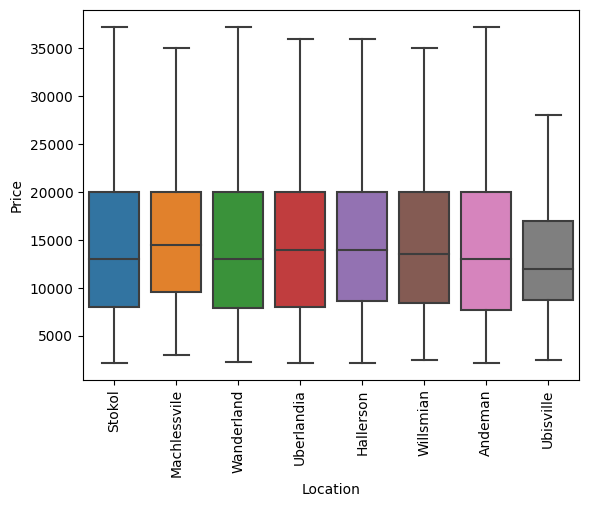

In [ ]:
sns.boxplot(x='location', y='Price', data=train)
plt.xlabel('Location')
plt.ylabel('Price')
plt.xticks(rotation='vertical')

#Showing plot
plt.show()

In [ ]:
#Removing outliers of price
boxplot_stats = train.groupby('location')['Price'].describe()
lower_whisker = boxplot_stats['25%'] - 1.5 * (boxplot_stats['75%'] - boxplot_stats['25%'])
upper_whisker = boxplot_stats['75%'] + 1.5 * (boxplot_stats['75%'] - boxplot_stats['25%'])
mask = (train['location'].map(lower_whisker) <= train['Price']) & (train['Price'] <= train['location'].map(upper_whisker))
train = train[mask]
train.reset_index(drop=True, inplace=True)

train

,location,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
0,Stokol,1.0,0.0,0.0,1.0,1.0,7.8,10,3.0,13500
1,Machlessvile,0.0,1.0,1.0,1.0,0.0,5.6,4,2.0,13000
2,Wanderland,1.0,1.0,0.0,1.0,1.0,7.2,38,3.0,19000
3,Uberlandia,1.0,0.0,0.0,1.0,0.0,7.3,6,3.0,6000
4,Stokol,0.0,0.0,1.0,1.0,0.0,7.2,30,3.0,20000
...,...,...,...,...,...,...,...,...,...,...
1868,Willsmian,0.0,0.0,0.0,1.0,1.0,6.4,4,3.0,18000
1869,Uberlandia,1.0,0.0,0.0,1.0,0.0,2.0,1,1.0,4500
1870,Andeman,1.0,0.0,0.0,1.0,0.0,7.6,3,3.0,5000
1871,Willsmian,1.0,0.0,0.0,1.0,1.0,6.7,10,3.0,14000


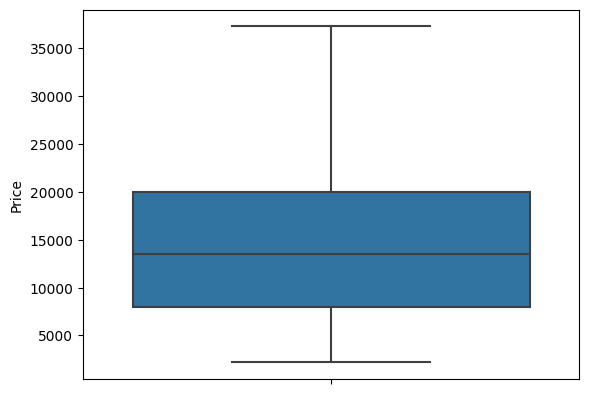

In [ ]:
sns.boxplot(y='Price', data=train)

plt.ylabel('Price')
plt.xticks(rotation='vertical')

#Showing plot
plt.show()

In [ ]:
#Removing outliers of price
q1 = train['Price'].quantile(0.25)
q3  = train['Price'].quantile(0.75)
iqr = q3 - q1
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

train = train[(train['Price'] <= upper_threshold) & (train['Price'] >= lower_threshold)]
train.describe()

,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000
mean,0.832355,0.216231,0.443673,0.854778,0.331020,7.208649,15.805659,3.135077,14787.016551
std,0.373651,0.411783,0.496950,0.352418,0.470706,1.398966,29.925828,0.723102,8360.362975
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2200.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,6.400000,3.000000,3.000000,8000.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,7.300000,7.000000,3.000000,13500.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,8.100000,17.000000,4.000000,20000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,351.000000,4.000000,37250.000000


In [ ]:
#Removing outliers of reviews
q1 = train['reviews'].quantile(0.25)
q3  = train['reviews'].quantile(0.75)
iqr = q3 - q1
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

train = train[(train['reviews'] <= upper_threshold) & (train['reviews'] >= lower_threshold)]
train.describe()

,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,0.837483,0.226141,0.394882,0.868603,0.314661,7.227178,5.948824,3.142462,14081.651452
std,0.369052,0.418476,0.488995,0.337951,0.464541,1.532874,4.648043,0.781558,8576.837554
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2200.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,6.400000,2.000000,3.000000,7515.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,7.400000,4.000000,3.000000,12000.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,8.300000,9.000000,4.000000,20000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,19.000000,4.000000,37250.000000


In [ ]:
train.reset_index(drop=True, inplace=True)
train.sort_values('Price')

,location,Bar,Gym,Internet,Restaurant,Swimming Pool,rating_num,reviews,predicate,Price
629,Andeman,1.0,0.0,0.0,1.0,0.0,3.6,1,1.0,2200
640,Hallerson,1.0,0.0,0.0,1.0,0.0,3.6,1,1.0,2200
1316,Stokol,1.0,0.0,0.0,1.0,0.0,3.6,1,1.0,2200
840,Uberlandia,1.0,0.0,0.0,1.0,0.0,3.6,1,1.0,2200
674,Andeman,1.0,0.0,0.0,0.0,0.0,4.3,3,2.0,2250
...,...,...,...,...,...,...,...,...,...,...
720,Uberlandia,1.0,1.0,0.0,1.0,1.0,10.0,1,4.0,36000
573,Wanderland,0.0,0.0,1.0,1.0,1.0,9.1,12,4.0,37200
833,Andeman,0.0,0.0,1.0,1.0,1.0,9.1,12,4.0,37200
1335,Andeman,1.0,1.0,1.0,1.0,1.0,8.8,2,4.0,37250


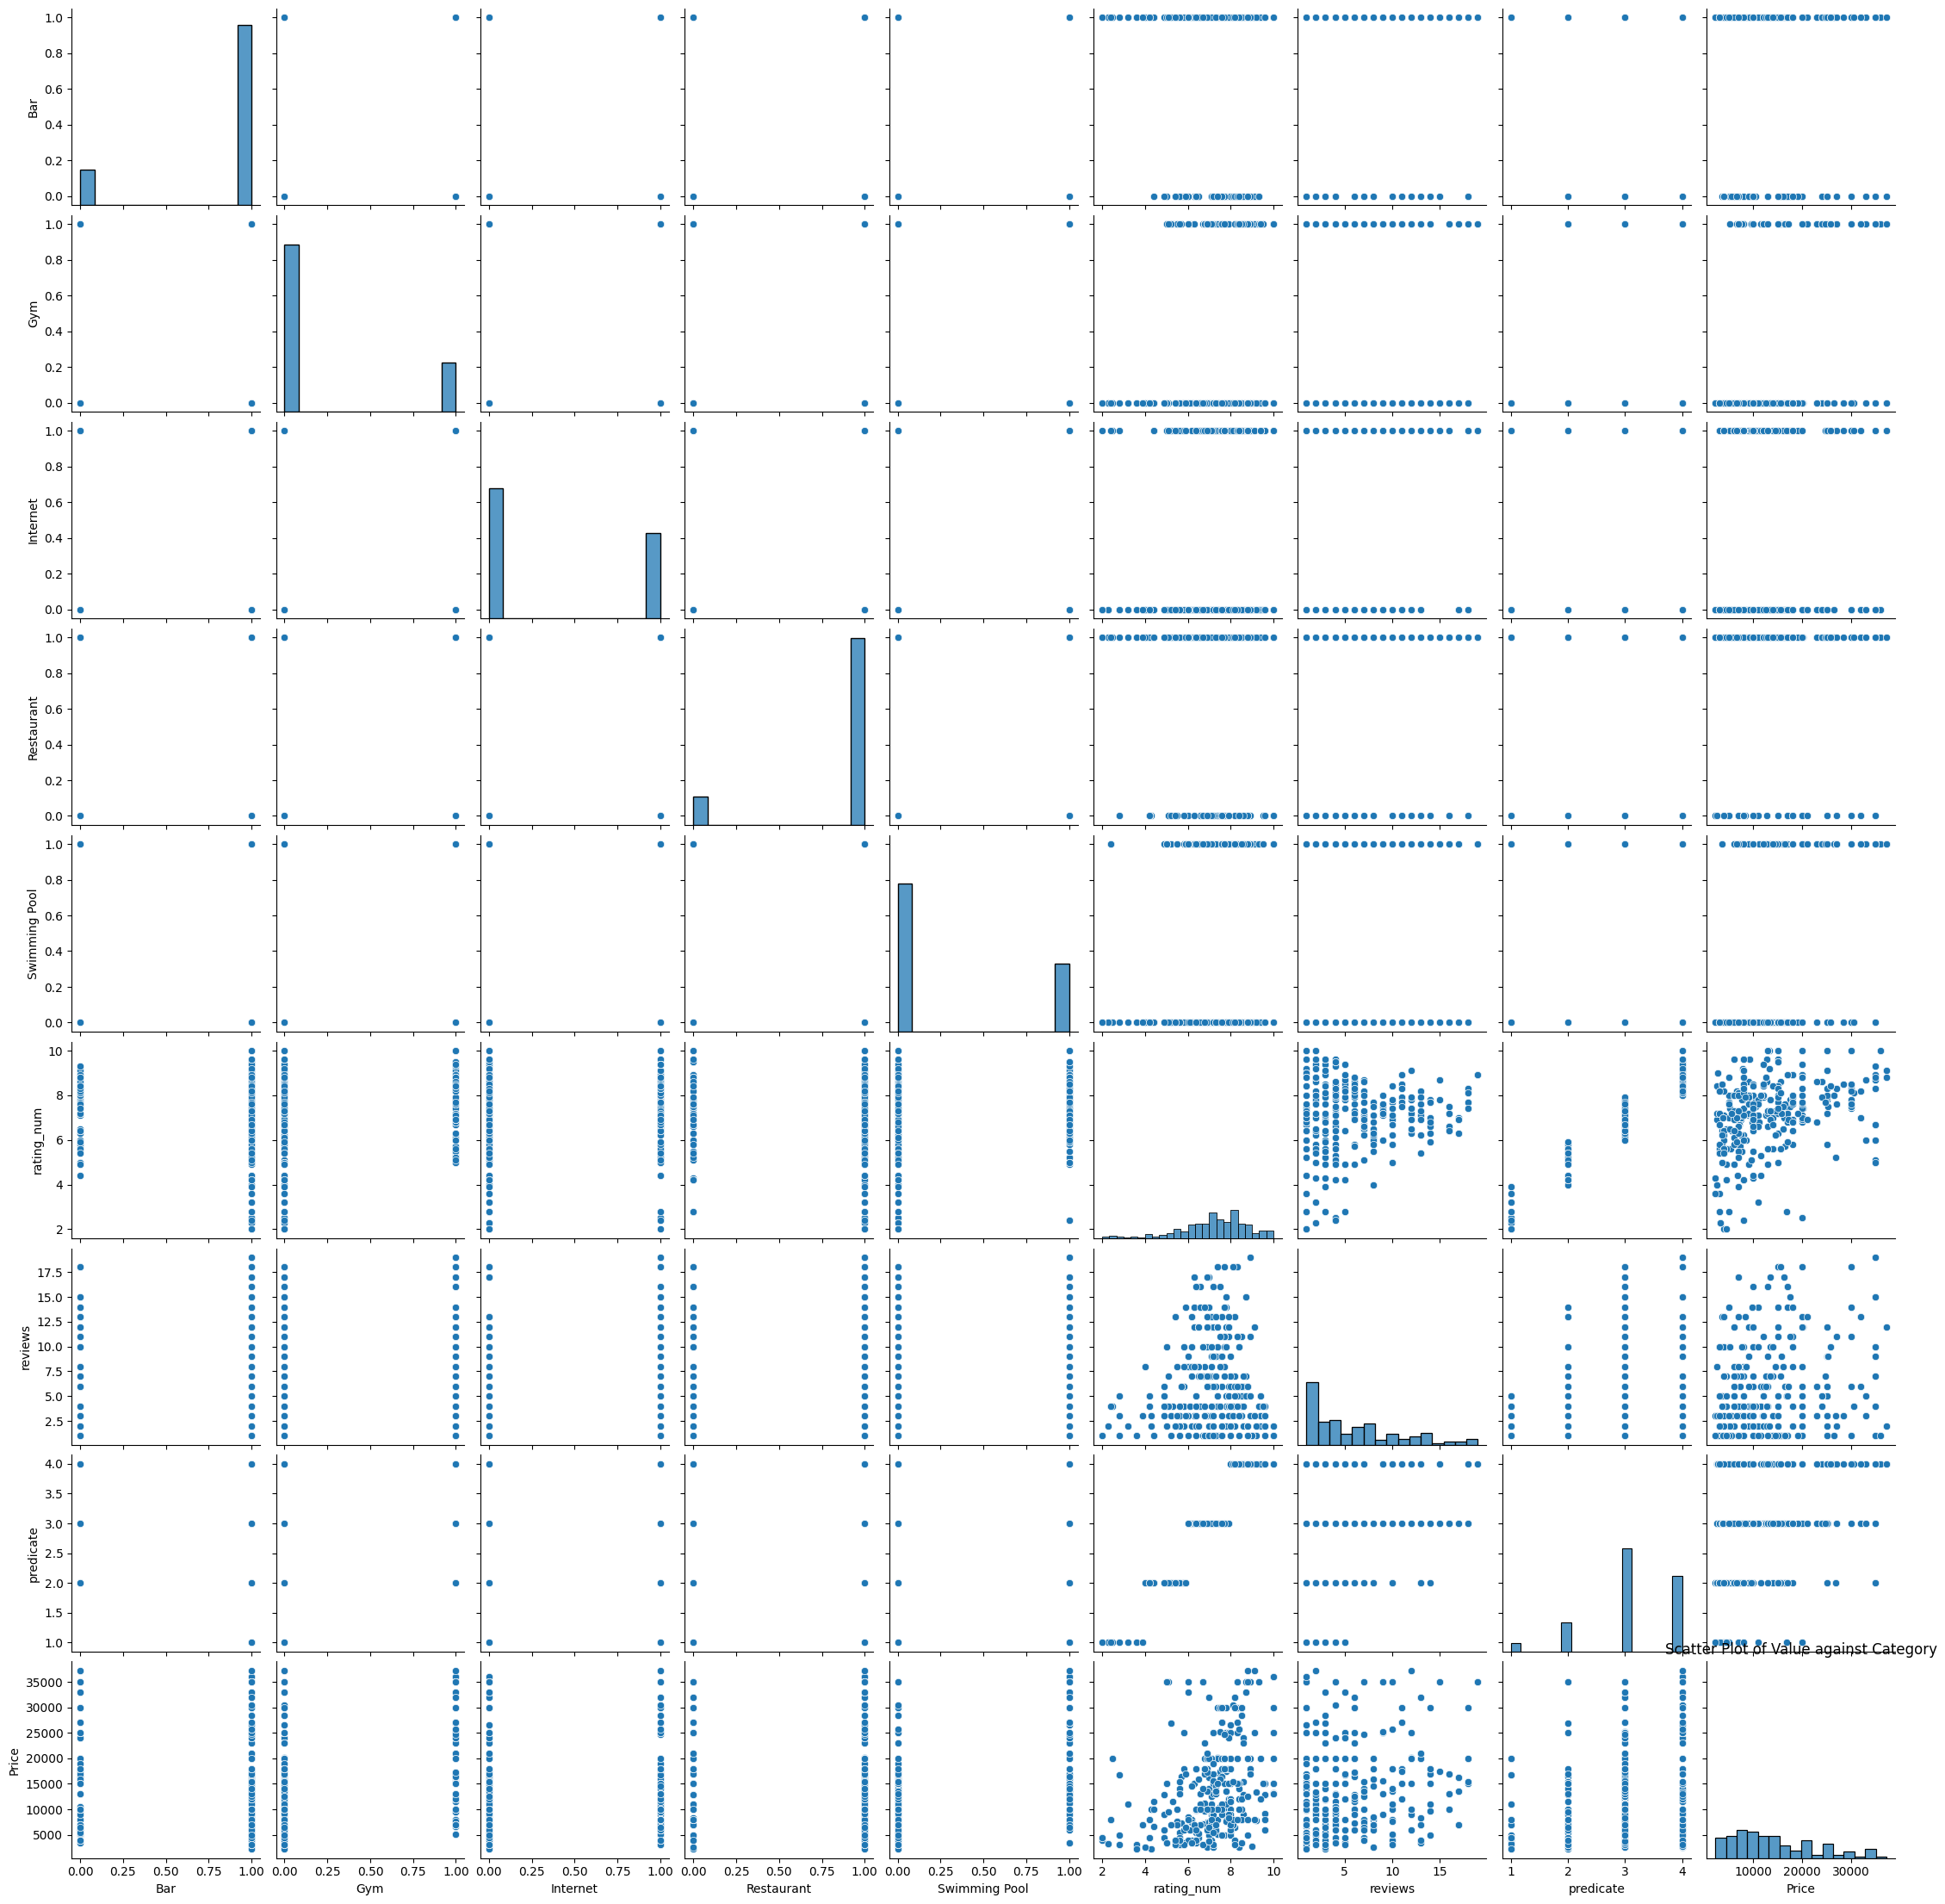

In [ ]:
sns.pairplot(data=train)
plt.title('Scatter Plot of Value against Category')
plt.show()

In [ ]:
#Splitting train into features and labels
features = train.drop(['Price'],axis = 1)
labels = train['Price']

In [ ]:
#Label Encoding

location_enc = pd.get_dummies(features['location'])
features = pd.concat([features, location_enc], axis=1)
features.drop('location', axis=1, inplace=True)
features.info()

location_enc = pd.get_dummies(test['location'])
test = pd.concat([test, location_enc], axis=1)
test.drop('location', axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bar            1446 non-null   float64
 1   Gym            1446 non-null   float64
 2   Internet       1446 non-null   float64
 3   Restaurant     1446 non-null   float64
 4   Swimming Pool  1446 non-null   float64
 5   rating_num     1446 non-null   float64
 6   reviews        1446 non-null   int64  
 7   predicate      1446 non-null   float64
 8   Andeman        1446 non-null   uint8  
 9   Hallerson      1446 non-null   uint8  
 10  Machlessvile   1446 non-null   uint8  
 11  Stokol         1446 non-null   uint8  
 12  Uberlandia     1446 non-null   uint8  
 13  Ubisville      1446 non-null   uint8  
 14  Wanderland     1446 non-null   uint8  
 15  Willsmian      1446 non-null   uint8  
dtypes: float64(7), int64(1), uint8(8)
memory usage: 101.8 KB
<class 'pandas.core.frame.DataFrame'>
R

In [ ]:
#Converting data types into integer
features[['Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool', 'predicate']] = features[['Bar', 'Gym', 'Internet', 'Restaurant', 'Swimming Pool', 'predicate']].astype(int)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bar            1446 non-null   int64  
 1   Gym            1446 non-null   int64  
 2   Internet       1446 non-null   int64  
 3   Restaurant     1446 non-null   int64  
 4   Swimming Pool  1446 non-null   int64  
 5   rating_num     1446 non-null   float64
 6   reviews        1446 non-null   int64  
 7   predicate      1446 non-null   int64  
 8   Andeman        1446 non-null   uint8  
 9   Hallerson      1446 non-null   uint8  
 10  Machlessvile   1446 non-null   uint8  
 11  Stokol         1446 non-null   uint8  
 12  Uberlandia     1446 non-null   uint8  
 13  Ubisville      1446 non-null   uint8  
 14  Wanderland     1446 non-null   uint8  
 15  Willsmian      1446 non-null   uint8  
dtypes: float64(1), int64(7), uint8(8)
memory usage: 101.8 KB


#Feature Selection

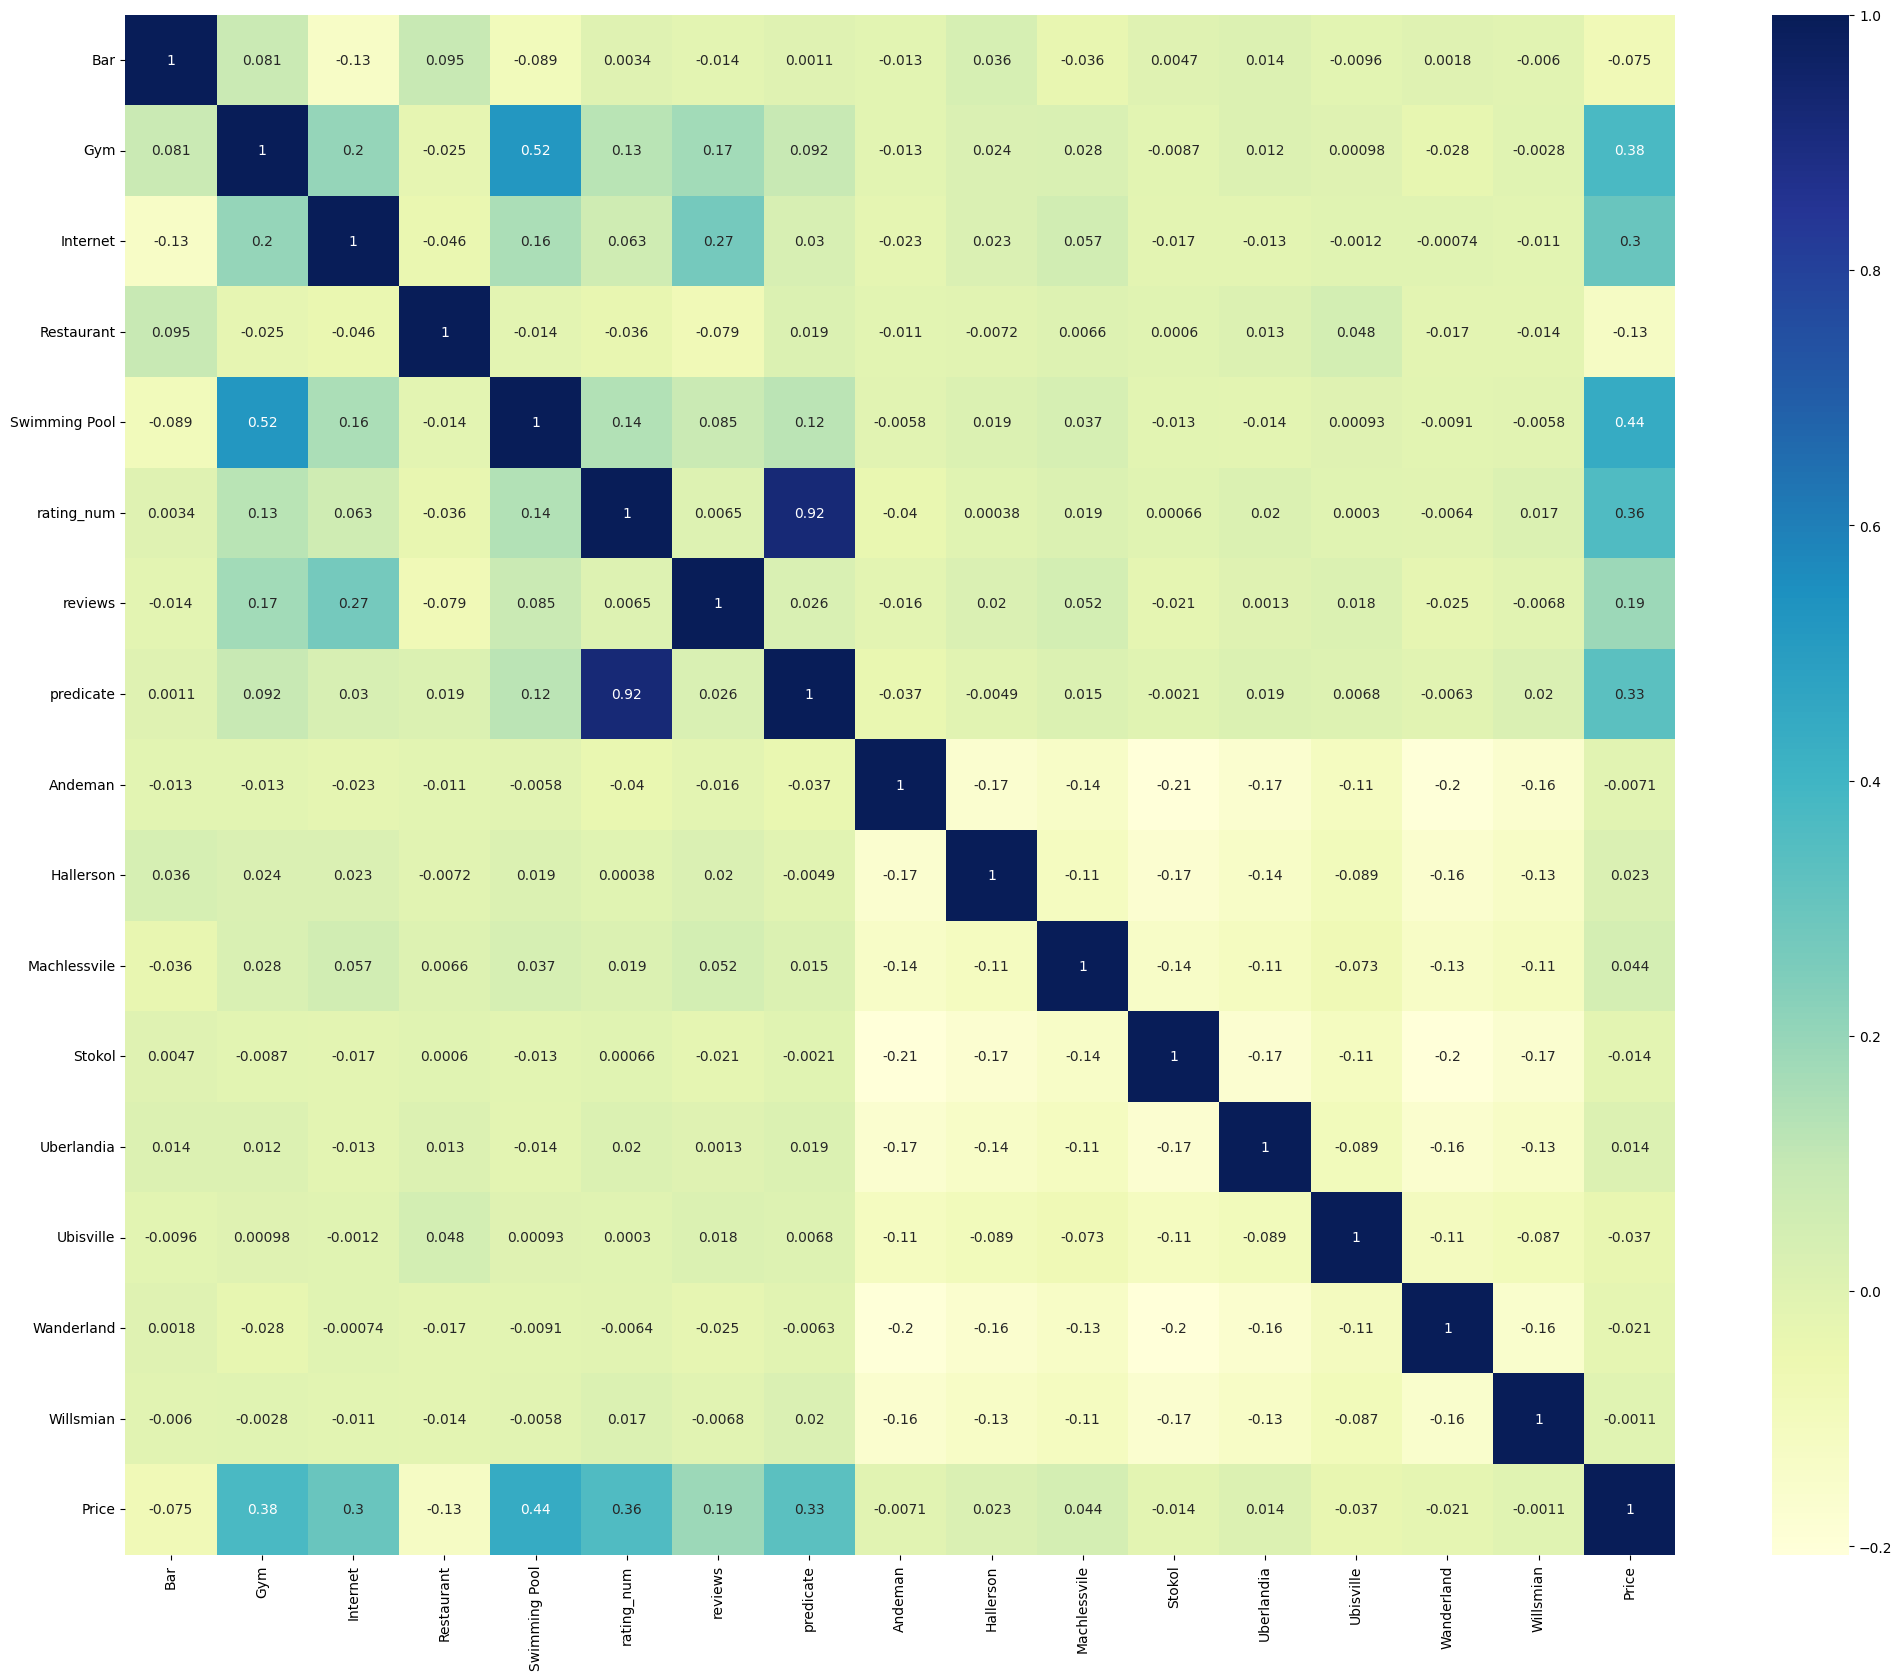

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (25, 20))
sns.heatmap(pd.concat([features, labels], axis=1).corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
#Removing columns because of multicolinearity and negative correlation
features.drop(['Bar','Restaurant', 'predicate', 'Andeman', 'Stokol', 'Ubisville', 'Wanderland', 'Willsmian'], axis=1, inplace=True)
test.drop(['Bar','Restaurant', 'predicate', 'Andeman', 'Stokol', 'Ubisville', 'Wanderland', 'Willsmian'], axis=1, inplace=True)

#Feature Scaling

In [ ]:
X = features
labels.reset_index(drop=True, inplace=True)
y = labels
X

,Gym,Internet,Swimming Pool,rating_num,reviews,Hallerson,Machlessvile,Uberlandia
0,0,0,1,7.8,10,0,0,0
1,1,1,0,5.6,4,0,1,0
2,0,0,0,7.3,6,0,0,1
3,0,1,0,5.4,13,0,0,1
4,0,0,0,7.9,3,1,0,0
...,...,...,...,...,...,...,...,...
1441,1,1,0,10.0,1,1,0,0
1442,0,0,1,6.4,4,0,0,0
1443,0,0,0,2.0,1,0,0,1
1444,0,0,0,7.6,3,0,0,0


In [ ]:
#Scaling rating_num and reviews using min max scaler
scaler = MinMaxScaler()
X[['rating_num', 'reviews']] = scaler.fit_transform(X[['rating_num', 'reviews']])
test[['rating_num', 'reviews']] = scaler.fit_transform(test[['rating_num', 'reviews']])
X

,Gym,Internet,Swimming Pool,rating_num,reviews,Hallerson,Machlessvile,Uberlandia
0,0,0,1,0.7250,0.500000,0,0,0
1,1,1,0,0.4500,0.166667,0,1,0
2,0,0,0,0.6625,0.277778,0,0,1
3,0,1,0,0.4250,0.666667,0,0,1
4,0,0,0,0.7375,0.111111,1,0,0
...,...,...,...,...,...,...,...,...
1441,1,1,0,1.0000,0.000000,1,0,0
1442,0,0,1,0.5500,0.166667,0,0,0
1443,0,0,0,0.0000,0.000000,0,0,1
1444,0,0,0,0.7000,0.111111,0,0,0


#Model

In [ ]:
#Splitting data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5312.788101307267
MSE: 48014704.67109494
RMSE: 6929.264367239493
R2 Score: 0.30783268551541443
------------------------------
RMSE Cross-Validation: 6907.052774520916


<ipython-input-80-5f2987ca3ec6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


Ridge Regression

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5315.614047568399
MSE: 47995910.60341066
RMSE: 6927.9080972116435
R2 Score: 0.3081036158365813
------------------------------
RMSE Cross-Validation: 6906.58204928192


<ipython-input-81-07da274fd675>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


Lasso Regression

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5312.323982610983
MSE: 48004025.5320006
RMSE: 6928.493741932701
R2 Score: 0.3079866331670468
------------------------------
RMSE Cross-Validation: 6906.8960061453345


<ipython-input-82-13e1946c29a5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


Elastic Net Regression

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5998.656741601248
MSE: 56492626.92303057
RMSE: 7516.157723400339
R2 Score: 0.18561719512078034
------------------------------
RMSE Cross-Validation: 7732.399645145441


<ipython-input-83-87ca1af79f4b>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


SVR

In [ ]:
svr = SVR(C=4000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 5318.981583856381
MSE: 51123823.11511642
RMSE: 7150.092524933955
R2 Score: 0.26301245432677256
------------------------------
RMSE Cross-Validation: 7125.413432766135


<ipython-input-84-c8a428cfd2ba>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


Random Forest Regressor

In [ ]:
random_forest = RandomForestRegressor(n_estimators=200)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1412.6380925874712
MSE: 7420277.604747198
RMSE: 2724.0186498530434
R2 Score: 0.8930312357934814
------------------------------
RMSE Cross-Validation: 2646.641275531916


<ipython-input-85-85bbc699ba4e>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


Gradient Boost Regressor

In [ ]:
xgb = XGBRegressor(n_estimators=200, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 3692.423319029918
MSE: 25838779.95666783
RMSE: 5083.186004531786
R2 Score: 0.6275149653699399
------------------------------
RMSE Cross-Validation: 5090.487219638175


<ipython-input-86-64485b96d5e2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


Polynomial Regression

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 6585.812850153318
MSE: 74091134.05841953
RMSE: 8607.620696709371
R2 Score: -0.0680782406062892
------------------------------
RMSE Cross-Validation: 6907.052774520916


<ipython-input-87-883bf0539340>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


#Model Validation

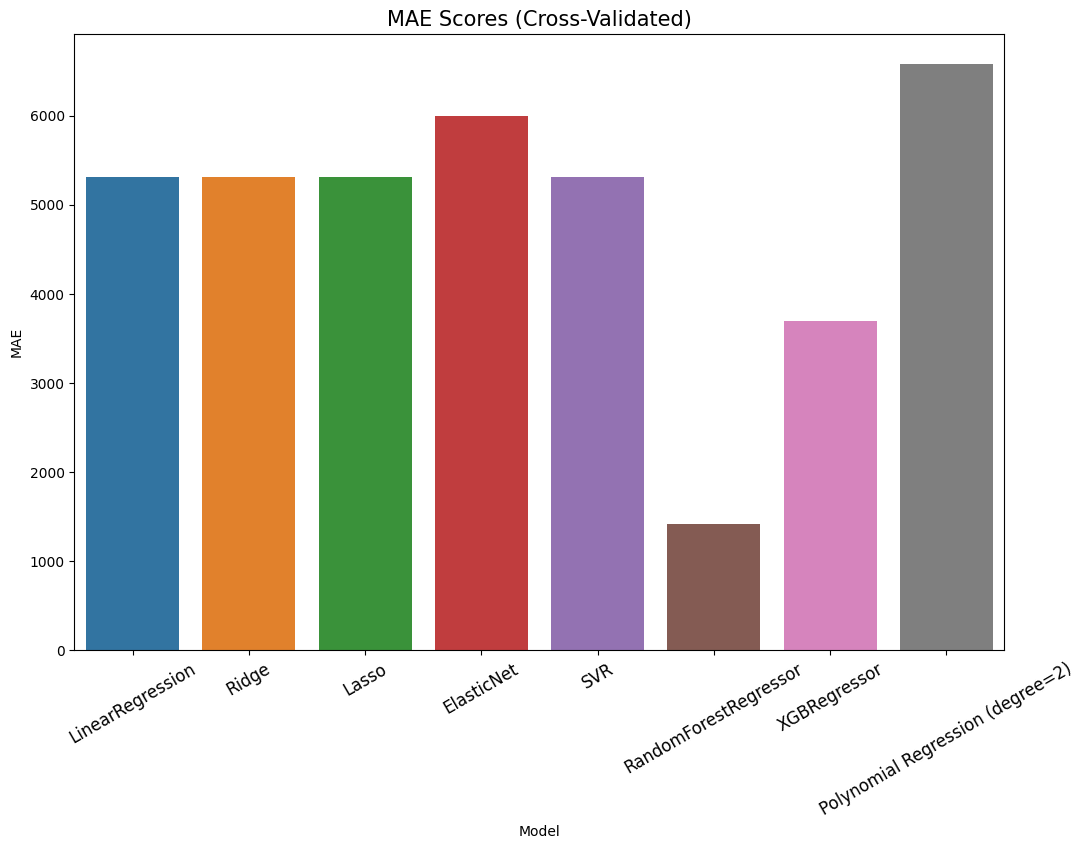

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MAE"])
plt.title("MAE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [ ]:
models.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,1412.638093,7.420278e+06,2724.018650,0.893031,2646.641276
6,XGBRegressor,3692.423319,2.583878e+07,5083.186005,0.627515,5090.487220
2,Lasso,5312.323983,4.800403e+07,6928.493742,0.307987,6906.896006
0,LinearRegression,5312.788101,4.801470e+07,6929.264367,0.307833,6907.052775
1,Ridge,5315.614048,4.799591e+07,6927.908097,0.308104,6906.582049
4,SVR,5318.981584,5.112382e+07,7150.092525,0.263012,7125.413433
3,ElasticNet,5998.656742,5.649263e+07,7516.157723,0.185617,7732.399645
7,Polynomial Regression (degree=2),6585.812850,7.409113e+07,8607.620697,-0.068078,6907.052775


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    #add an input layer and specify the input size of 8 columns
    tf.keras.Input(shape=(8)),
    #add a hidden layer with 32 neurons and sigmoid activation
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

#compile the model with selected spesification
model.compile(
    #use adam optimizers to adjusts the learning rate automatically
    optimizer='adam',
    #use binary cross entropy loss because we're predicting binary labels
    loss='mae',
    #use accuracy to mesure performance
    metrics=[ tf.keras.losses.mean_absolute_error])

#fit the model into training data, store the process in history variable
history = model.fit(
    #specify training features
    X_train,
    #specify training labels
    y_train,
    #specify number of training epochs
    epochs=1000,
    #specify how many information to output for each epoch
    verbose=2,
    #specify validation fetures and labels
    validation_data=(X_test, y_test),
    #specify number of data to feed into the model
)

Epoch 1/1000
32/32 - 1s - loss: 14020.8691 - mean_absolute_error: 14020.8691 - val_loss: 14220.4756 - val_mean_absolute_error: 14220.4756 - 1s/epoch - 34ms/step
Epoch 2/1000
32/32 - 0s - loss: 14019.9756 - mean_absolute_error: 14019.9756 - val_loss: 14219.3213 - val_mean_absolute_error: 14219.3213 - 94ms/epoch - 3ms/step
Epoch 3/1000
32/32 - 0s - loss: 14018.5586 - mean_absolute_error: 14018.5586 - val_loss: 14217.4873 - val_mean_absolute_error: 14217.4873 - 92ms/epoch - 3ms/step
Epoch 4/1000
32/32 - 0s - loss: 14016.4082 - mean_absolute_error: 14016.4082 - val_loss: 14214.8701 - val_mean_absolute_error: 14214.8701 - 93ms/epoch - 3ms/step
Epoch 5/1000
32/32 - 0s - loss: 14013.5059 - mean_absolute_error: 14013.5059 - val_loss: 14211.4717 - val_mean_absolute_error: 14211.4717 - 102ms/epoch - 3ms/step
Epoch 6/1000
32/32 - 0s - loss: 14009.8125 - mean_absolute_error: 14009.8125 - val_loss: 14207.2070 - val_mean_absolute_error: 14207.2070 - 96ms/epoch - 3ms/step
Epoch 7/1000
32/32 - 0s - lo

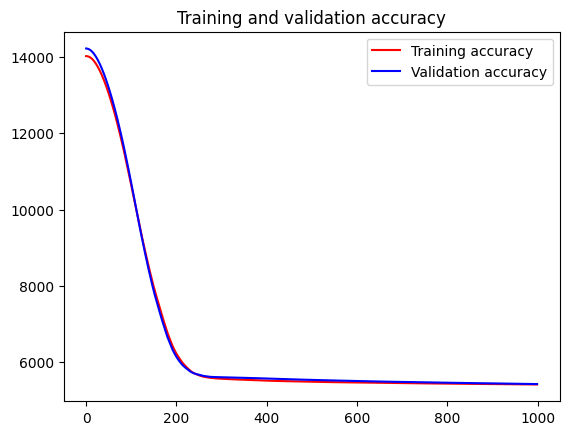

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

In [ ]:
predictions = model.predict(test)

24/24 [==============================] - 0s 1ms/step


In [ ]:
submission = pd.DataFrame({
    "ID": id,
    "Price": predictions.flatten().astype(int),
})

In [ ]:
submission.describe()

,ID,Price
count,767.000000,767.000000
mean,383.000000,22900.426336
std,221.558119,2546.905453
min,0.000000,14018.000000
25%,191.500000,21373.500000
50%,383.000000,23375.000000
75%,574.500000,24824.000000
max,766.000000,28392.000000


In [ ]:
submission.to_csv('result.csv', index=False)